<a id='top'></a>

# FBref Player Stats Web Scraping
##### Notebook to scrape raw data from [FBref](https://fbref.com/en/) via [StatsBomb](https://statsbomb.com/) using the [pandas](http://pandas.pydata.org/)

### By [Edd Webster](https://www.twitter.com/eddwebster)
Notebook first written: 31/08/2020<br>
Notebook last updated: 31/08/2021

![title](../../img/fbref-logo-banner.png)

![title](../../img/stats-bomb-logo.png)

___

<a id='sectionintro'></a>

## <a id='import_libraries'>Introduction</a>
This notebook scrapes player statstics data from [FBref](https://fbref.com/en/) via [StatsBomb](https://statsbomb.com/), using the [pandas](http://pandas.pydata.org/) [`read_html`](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) function [pandas](http://pandas.pydata.org/) for webscraping and data manipulation through DataFrames.

For more information about this notebook and the author, I am available through all the following channels:
*    [eddwebster.com](https://www.eddwebster.com/);
*    edd.j.webster@gmail.com;
*    [@eddwebster](https://www.twitter.com/eddwebster);
*    [linkedin.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/);
*    [github/eddwebster](https://github.com/eddwebster/);
*    [public.tableau.com/profile/edd.webster](https://public.tableau.com/profile/edd.webster);
*    [kaggle.com/eddwebster](https://www.kaggle.com/eddwebster); and
*    [hackerrank.com/eddwebster](https://www.hackerrank.com/eddwebster).

![title](../../img/fifa21eddwebsterbanner.png)

The accompanying GitHub repository for this notebook can be found [here](https://github.com/eddwebster/football_analytics) and a static version of this notebook can be found [here](https://nbviewer.jupyter.org/github/eddwebster/football_analytics/blob/master/notebooks/A%29%20Web%20Scraping/FBref%20Web%20Scraping%20and%20Parsing.ipynb).

___

<a id='sectioncontents'></a>

## <a id='notebook_contents'>Notebook Contents</a>
1.    [Notebook Dependencies](#section1)<br>
2.    [Project Brief](#section2)<br>
3.    [Data Scraping](#section3)<br>
      1.    [Introduction](#section3.1)<br>
      2.    [Outfielder Players](#section3.2)<br>
            1.    [Data Dictionary](#section3.2.1)<br>
            2.    [Creating the DataFrame](#section3.2.2)<br>
            3.    [Initial Data Handling](#section3.2.3)<br>
            4.    [Export the Raw DataFrame](#section3.2.4)<br>
      3.    [Goalkeepers](#section3.3)<br>
            1.    [Data Dictionary](#section3.3.1)<br>
            2.    [Creating the DataFrame](#section3.3.2)<br>
            3.    [Initial Data Handling](#section3.3.3)<br>
            4.    [Export the Raw DataFrame](#section3.3.4)<br> 
4.    [Summary](#section4)<br>
5.    [Next Steps](#section5)<br>
6.    [References](#section6)<br>

___

<a id='section1'></a>

## <a id='#section1'>1. Notebook Dependencies</a>

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [`Jupyter notebooks`](https://jupyter.org/) for this notebook environment with which this project is presented;
*    [`NumPy`](http://www.numpy.org/) for multidimensional array computing; and
*    [`pandas`](http://pandas.pydata.org/) for data analysis and manipulation.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

### Import Libraries and Modules

In [1]:
# Python ≥3.5 (ideally)
import platform
import sys, getopt
assert sys.version_info >= (3, 5)
import csv

# Import Dependencies
%matplotlib inline

# Math Operations
import numpy as np
from math import pi

# Datetime
import datetime
from datetime import date
import time

# Data Preprocessing
import pandas as pd
import pandas_profiling as pp
import os
import re
import random
import glob
from io import BytesIO
from pathlib import Path

# Reading directories
import glob
import os

# Working with JSON
import json
from pandas.io.json import json_normalize

# Web Scraping
import requests
from bs4 import BeautifulSoup
import re

# Data Visualisation
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-whitegrid')
import missingno as msno

# Progress Bar
from tqdm import tqdm

# Display in Jupyter
from IPython.display import Image, YouTubeVideo
from IPython.core.display import HTML

# Ignore Warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print('Setup Complete')

Setup Complete


In [2]:
# Python / module versions used here for reference
print('Python: {}'.format(platform.python_version()))
print('NumPy: {}'.format(np.__version__))
print('pandas: {}'.format(pd.__version__))
print('matplotlib: {}'.format(mpl.__version__))

Python: 3.7.6
NumPy: 1.20.3
pandas: 1.3.2
matplotlib: 3.4.2


### Define Filepaths

In [3]:
# Set up initial paths to subfolders
base_dir = os.path.join('..', '..')
data_dir = os.path.join(base_dir, 'data')
data_dir_fbref = os.path.join(base_dir, 'data', 'fbref')
img_dir = os.path.join(base_dir, 'img')
fig_dir = os.path.join(base_dir, 'img', 'fig')
video_dir = os.path.join(base_dir, 'video')

### Defined Variables

In [4]:
# Defined variables

## Define today's date
today = datetime.datetime.now().strftime('%d/%m/%Y').replace('/', '')

### Defined Dictionaries

In [ ]:
# Define league names and their IDs
dict_league_names = {'Premier-League': '9',
                     'Ligue-1': '13',
                     'Bundesliga': '20',
                     'Serie-A': '11',
                     'La-Liga': '12',
                     'Major-League-Soccer': '22',
                     'Big-5-European-Leagues': 'Big5'
                    }

### Defined Lists

In [5]:
# Defined Lists

## Define list of long names for 'Big 5' European Leagues and MLS
lst_league_names_long = ['Premier-League', 'Ligue-1', 'Bundesliga', 'Serie-A', 'La-Liga', 'Major-League-Soccer', 'Big-5-European-Leagues']

## Define seasons to scrape
lst_seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']

## Define list of folders
lst_folders = ['raw', 'engineered', 'reference']

## Define list of data types
lst_data_types = ['goalkeeper', 'outfield', 'team']

### Custom Functions (Scrapers)

In [160]:
# Define function for scraping a defined season and competition of FBref player data
def get_fbref_player_stats(lst_league_names, lst_seasons):
    
    """
    Function to scrape player stats from FBref.
    """
    
    
    ## Define list of league names
    league_names_long = lst_league_names
    
    
    ## Define seasons to scrape
    seasons = lst_seasons
    
    
    ## Start timer
    tic = datetime.datetime.now()
    
    
    ## Print time scraping started
    print(f'Scraping started at: {tic}')
    
    
    ## Scrape information for each player
    for season in seasons:

        ### Print message
        print(f'Scraping started for the {season} season...')

        ### Loop through leagues
        for league_name_long in league_names_long:
            
            #### Determine league short name from the league names dictionary
            league_name_short = [v for k,v in dict_league_names.items() if k == league_name_long][0]
            
            #### Save Player URL List (if not already saved)
            if not os.path.exists(os.path.join(data_dir_fbref + f'/raw/outfield/{league_name_long}/{season}/fbref_outfield_player_stats_{league_name_long}_{season}_latest.csv')):

                ##### Scraping

                ##### Print statement
                print(f'Scraping started for player stats data for {league_name_long} league for the {season} season...')

                ##### Standard stats
                print(f'Scraping Standard stats...')
                url_std_stats = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fstats%2Fplayers%2F{season}-{league_name_long}&div=div_stats_standard'
                df_std_stats = pd.read_html(url_std_stats, header=1)[0]

                ##### Goalkeeper stats
                #print(f'Scraping Goalkeeper stats...')
                #url_keepers = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fkeepers%2Fplayers%2F{season}-{league_name_long}&div=div_stats_keeper'
                #df_keepers = pd.read_html(url_keepers, header=1)[0]

                ##### Advanced Goalkeeper stats
                #print(f'Scraping Advanced Goalkeeper stats...')
                #url_keepers_adv = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fkeepersadv%2Fplayers%2F{season}-{league_name_long}&div=div_stats_keeper_adv'
                #df_keepers_adv = pd.read_html(url_keepers_adv, header=1)[0]

                ##### Shooting stats
                print(f'Scraping Shooting stats...')
                url_shooting = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fshooting%2Fplayers%2F{season}-{league_name_long}&div=div_stats_shooting'
                df_shooting = pd.read_html(url_shooting, header=1)[0]

                ##### Passing stats
                print(f'Scraping Passing stats...')
                url_passing = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fpassing%2Fplayers%2F{season}-{league_name_long}&div=div_stats_passing'
                df_passing = pd.read_html(url_passing, header=1)[0]

                ##### Pass Types stats
                print(f'Scraping Pass Types stats...')
                url_passing_types = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fpassing_types%2Fplayers%2F{season}-{league_name_long}&div=div_stats_passing_types'
                df_passing_types = pd.read_html(url_passing_types, header=1)[0]

                ##### Goals and Shot Creation stats
                print(f'Scraping Goals and Shot Creation stats...')
                url_gca = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fgca%2Fplayers%2F{season}-{league_name_long}&div=div_stats_gca'
                df_gca = pd.read_html(url_gca, header=1)[0]

                ##### Defensive Actions stats
                print(f'Scraping Defensive Actions stats...')
                url_defense = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fdefense%2Fplayers%2F{season}-{league_name_long}&div=div_stats_defense'
                df_defense = pd.read_html(url_defense, header=1)[0]

                ##### Possession stats
                print(f'Scraping Possession stats...')
                url_possession = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fpossession%2Fplayers%2F{season}-{league_name_long}&div=div_stats_possession'
                df_possession = pd.read_html(url_possession, header=1)[0]

                ##### Playing Time stats
                print(f'Scraping Playing Time stats...')
                url_playing_time = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fplayingtime%2Fplayers%2F{season}-{league_name_long}&div=div_stats_playing_time'
                df_playing_time = pd.read_html(url_playing_time, header=1)[0]

                ##### Miscellaneous stats
                print(f'Scraping Miscellaneous stats...')
                url_misc = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fmisc%2Fplayers%2F{season}-{league_name_long}&div=div_stats_misc'
                df_misc = pd.read_html(url_misc, header=1)[0]

                ##### Concatenate defined individual DataFrames
                
                ####### Define DataFrames to be concatenated side-by-side (not all of them)
                lst_dfs = [df_std_stats, df_shooting, df_passing, df_passing_types, df_gca, df_defense, df_possession]

                ###### Concatenate DataFrames side-by-side (indicated in list above)
                df_all = pd.concat(lst_dfs, axis=1)

                ###### Drop duplicate columns
                df_all = df_all.loc[:,~df_all.columns.duplicated()]

                ###### Drop duplicate rows
                df_all = df_all.drop_duplicates()
                
                ##### Left join defined individual DataFrames
                
                ####### Define join conditions
                conditions_join = ['Player', 'Nation', 'Pos', 'Squad', 'Comp']

                ###### Left join Playing Time data
                df_all = pd.merge(df_all, df_playing_time, left_on=conditions_join, right_on=conditions_join, how='left')

                ###### Remove duplicate columns after join (contain '_y') and remove '_x' suffix from kept columns
                df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='_y')))]
                df_all.columns = df_all.columns.str.replace('_x','')
                
                ###### Drop duplicate rows
                df_all = df_all.drop_duplicates()

                ###### Left join Misc data
                df_all = pd.merge(df_all, df_misc, left_on=conditions_join, right_on=conditions_join, how='left')

                ###### Remove duplicate columns after join (contain '_y') and remove '_x' suffix from kept columns
                df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='_y')))]
                df_all.columns = df_all.columns.str.replace('_x','')
                
                ###### Drop duplicate rows
                df_all = df_all.drop_duplicates()
                
                
                ##### Engineer DataFrames
                
                ###### Take first two digits of age - fixes current season issue with extra values
                df_all['Age'] = df_all['Age'].astype(str).str[:2]
                
                ###### Create columns for league code and season
                df_all['League Name'] = league_name_long
                df_all['League ID'] = league_name_short
                df_all['Season'] = season              

                ###### Drop duplicates
                df_all = df_all.drop_duplicates()

                
                ##### Save DataFrame
                df_all.to_csv(data_dir_fbref + f'/raw/outfield/{league_name_long}/{season}/fbref_outfield_player_stats_{league_name_long}_{season}_latest.csv', index=None, header=True)        
                
                ##### Export a copy to the 'archive' subfolder, including the date
                df_all.to_csv(data_dir_fbref + f'/raw/outfield/{league_name_long}/{season}/archive/fbref_outfield_player_stats_{league_name_long}_{season}_last_updated_{today}.csv', index=None, header=True)        
                
                
                ##### Print statement for league and season
                print(f'All player stats data for the {league_name_long} league for {season} season scraped and saved.')
             
            
            #### Load player stats data (if already saved)
            else:

                ##### Print statement
                print(f'Player stats data for the {league_name_long} league for the {season} season already saved as a CSV file.')         

                
    ## End timer
    toc = datetime.datetime.now()
    
    
    ## Print time scraping ended
    print(f'Scraping ended at: {toc}')

    
    ## Calculate time take
    total_time = (toc-tic).total_seconds()
    print(f'Time taken to scrape the player stats data for {len(league_names_long)} leagues for {len(seasons)} seasons is: {total_time/60:0.2f} minutes.')

    
    ## Unify individual CSV files as a single DataFrame
    
    ### Show files in directory
    all_files = glob.glob(os.path.join(data_dir_fbref + f'/raw/outfield/*/*/fbref_outfield_player_stats_*_*_latest.csv'))
    
    ### Create an empty list of Players URLs
    lst_player_stats_all = []

    ### Loop through list of files and read into temporary DataFrames
    for filename in all_files:
        df_temp = pd.read_csv(filename, index_col=None, header=0)
        lst_player_stats_all.append(df_temp)

    ### Concatenate the files into a single DataFrame
    df_fbref_player_stats_all = pd.concat(lst_player_stats_all, axis=0, ignore_index=True)
    
    ### Drop header row of each concatenated  DataFrame (contains 'Rk', 'Rk' column)
    df_fbref_player_stats_all = df_fbref_player_stats_all[~df_fbref_player_stats_all['Rk'].str.contains('Rk')]
    
    ### Drop 'Rk' column
    df_fbref_player_stats_all = df_fbref_player_stats_all.drop(['Rk'], axis=1)
    
    ### Reset index
    #df_fbref_player_stats_all = df_fbref_player_stats_all.reset_index()
    
    ### Sort DataFrame
    df_fbref_player_stats_all = df_fbref_player_stats_all.sort_values(['League Name', 'Season', 'Player'], ascending=[True, True, True])

    
    ## Export DataFrame
    
    ###
    df_fbref_player_stats_all.to_csv(data_dir_fbref + f'/raw/outfield/fbref_outfield_player_stats_combined_latest.csv', index=None, header=True)
    
    ### Save a copy to archive folder (dated)
    df_fbref_player_stats_all.to_csv(data_dir_fbref + f'/raw/outfield/archive/fbref_outfield_player_stats_combined_last_updated_{today}.csv', index=None, header=True)
    
    
    ## Distinct number of players
    total_players = df_fbref_player_stats_all['Player'].nunique()


    ## Print statement
    print(f'Player stats DataFrame contains {total_players} players.')
    
    
    ## Return final list of Player URLs
    return(df_fbref_player_stats_all)

In [161]:
# Define function for scraping a defined season and competition of FBref player data
def get_fbref_goalkeeper_stats(lst_league_names, lst_seasons):
    
    """
    Function to scrape goalkeeper stats from FBref.
    """
    
    
    ## Define list of league names
    league_names_long = lst_league_names
    
    
    ## Define seasons to scrape
    seasons = lst_seasons
    
    
    ## Start timer
    tic = datetime.datetime.now()
    
    
    ## Print time scraping started
    print(f'Scraping started at: {tic}')
    
    
    ## Scrape information for each player
    for season in seasons:

        ### Print message
        print(f'Scraping started for the {season} season...')

        ### Loop through leagues
        for league_name_long in league_names_long:
            
            #### Determine league short name from the league names dictionary
            league_name_short = [v for k,v in dict_league_names.items() if k == league_name_long][0]
            
            #### Save Player URL List (if not already saved)
            if not os.path.exists(os.path.join(data_dir_fbref + f'/raw/goalkeeper/{league_name_long}/{season}/fbref_goalkeeper_stats_{league_name_long}_{season}_latest.csv')):

                ##### Scraping

                ##### Print statement
                print(f'Scraping started for goalkeeper stats data for {league_name_long} league for the {season} season...')

                ##### Standard stats
                print(f'Scraping Standard stats...')
                url_std_stats = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fstats%2Fplayers%2F{season}-{league_name_long}&div=div_stats_standard'
                df_std_stats = pd.read_html(url_std_stats, header=1)[0]

                ##### Goalkeeper stats
                print(f'Scraping Goalkeeper stats...')
                url_keepers = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fkeepers%2Fplayers%2F{season}-{league_name_long}&div=div_stats_keeper'
                df_keepers = pd.read_html(url_keepers, header=1)[0]

                ##### Advanced Goalkeeper stats
                print(f'Scraping Advanced Goalkeeper stats...')
                url_keepers_adv = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fkeepersadv%2Fplayers%2F{season}-{league_name_long}&div=div_stats_keeper_adv'
                df_keepers_adv = pd.read_html(url_keepers_adv, header=1)[0]

                ##### Playing Time stats
                print(f'Scraping Playing Time stats...')
                url_playing_time = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fplayingtime%2Fplayers%2F{season}-{league_name_long}&div=div_stats_playing_time'
                df_playing_time = pd.read_html(url_playing_time, header=1)[0]

                ##### Miscellaneous stats
                print(f'Scraping Miscellaneous stats...')
                url_misc = f'https://widgets.sports-reference.com/wg.fcgi?css=1&site=fb&url=%2Fen%2Fcomps%2F{league_name_short}%2F{season}%2Fmisc%2Fplayers%2F{season}-{league_name_long}&div=div_stats_misc'
                df_misc = pd.read_html(url_misc, header=1)[0]

                ##### Concatenate defined individual DataFrames
                
                ####### Define DataFrames to be concatenated side-by-side (not all of them)
                lst_dfs = [df_keepers, df_keepers_adv]

                ###### Concatenate DataFrames side-by-side (indicated in list above)
                df_all = pd.concat(lst_dfs, axis=1)

                ###### Drop duplicate columns
                df_all = df_all.loc[:,~df_all.columns.duplicated()]

                ###### Drop duplicate rows
                df_all = df_all.drop_duplicates()
                
                ##### Left join defined individual DataFrames
                
                ####### Define join conditions
                conditions_join = ['Player', 'Nation', 'Pos', 'Squad', 'Comp']

                ###### Left join Standard Stats data
                df_all = pd.merge(df_all, df_std_stats, left_on=conditions_join, right_on=conditions_join, how='left')

                ###### Remove duplicate columns after join (contain '_y') and remove '_x' suffix from kept columns
                df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='_y')))]
                df_all.columns = df_all.columns.str.replace('_x','')
                
                ###### Drop duplicate rows
                df_all = df_all.drop_duplicates()
                
                ###### Left join Playing Time data
                df_all = pd.merge(df_all, df_playing_time, left_on=conditions_join, right_on=conditions_join, how='left')

                ###### Remove duplicate columns after join (contain '_y') and remove '_x' suffix from kept columns
                df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='_y')))]
                df_all.columns = df_all.columns.str.replace('_x','')
                
                ###### Drop duplicate rows
                df_all = df_all.drop_duplicates()

                ###### Left join Misc data
                df_all = pd.merge(df_all, df_misc, left_on=conditions_join, right_on=conditions_join, how='left')

                ###### Remove duplicate columns after join (contain '_y') and remove '_x' suffix from kept columns
                df_all = df_all[df_all.columns.drop(list(df_all.filter(regex='_y')))]
                df_all.columns = df_all.columns.str.replace('_x','')
                
                ###### Drop duplicate rows
                df_all = df_all.drop_duplicates()
                
                
                ##### Engineer DataFrames
                
                ###### Take first two digits of age - fixes current season issue with extra values
                df_all['Age'] = df_all['Age'].astype(str).str[:2]
                
                ###### Create columns for league code and season
                df_all['League Name'] = league_name_long
                df_all['League ID'] = league_name_short
                df_all['Season'] = season              

                ###### Drop duplicates
                df_all = df_all.drop_duplicates()

                
                ##### Save DataFrame
                df_all.to_csv(data_dir_fbref + f'/raw/goalkeeper/{league_name_long}/{season}/fbref_goalkeeper_stats_{league_name_long}_{season}_latest.csv', index=None, header=True)        
                
                ##### Export a copy to the 'archive' subfolder, including the date
                df_all.to_csv(data_dir_fbref + f'/raw/goalkeeper/{league_name_long}/{season}/archive/fbref_goalkeeper_stats_{league_name_long}_{season}_last_updated_{today}.csv', index=None, header=True)        
                
                
                ##### Print statement for league and season
                print(f'All Goalkeeper stats data for the {league_name_long} league for {season} season scraped and saved.')
             
            
            #### Load goalkeeper stats data (if already saved)
            else:

                ##### Print statement
                print(f'Goalkeeper stats data for the {league_name_long} league for the {season} season already saved as a CSV file.')         

                
    ## End timer
    toc = datetime.datetime.now()
    
    
    ## Print time scraping ended
    print(f'Scraping ended at: {toc}')

    
    ## Calculate time take
    total_time = (toc-tic).total_seconds()
    print(f'Time taken to scrape the goalkeeper stats data for {len(league_names_long)} leagues for {len(seasons)} seasons is: {total_time/60:0.2f} minutes.')

    
    ## Unify individual CSV files as a single DataFrame
    
    ### Show files in directory
    all_files = glob.glob(os.path.join(data_dir_fbref + f'/raw/goalkeeper/*/*/fbref_goalkeeper_stats_*_*_latest.csv'))
    
    ### Create an empty list of Players URLs
    lst_goalkeeper_stats_all = []

    ### Loop through list of files and read into temporary DataFrames
    for filename in all_files:
        df_temp = pd.read_csv(filename, index_col=None, header=0)
        lst_goalkeeper_stats_all.append(df_temp)

    ### Concatenate the files into a single DataFrame
    df_fbref_goalkeeper_stats_all = pd.concat(lst_goalkeeper_stats_all, axis=0, ignore_index=True)
    
    ### Drop header row of each concatenated  DataFrame (contains 'Rk', 'Rk' column)
    df_fbref_goalkeeper_stats_all = df_fbref_goalkeeper_stats_all[~df_fbref_goalkeeper_stats_all['Rk'].str.contains('Rk')]
    
    ### Drop 'Rk' column
    df_fbref_goalkeeper_stats_all = df_fbref_goalkeeper_stats_all.drop(['Rk'], axis=1)
    
    ### Reset index
    #df_fbref_goalkeeper_stats_all = df_fbref_goalkeeper_stats_all.reset_index()
    
    ### Sort DataFrame
    df_fbref_goalkeeper_stats_all = df_fbref_goalkeeper_stats_all.sort_values(['League Name', 'Season', 'Player'], ascending=[True, True, True])

    
    ## Export DataFrame
    
    ###
    df_fbref_goalkeeper_stats_all.to_csv(data_dir_fbref + f'/raw/goalkeeper/fbref_goalkeeper_stats_combined_latest.csv', index=None, header=True)
    
    ### Save a copy to archive folder (dated)
    df_fbref_goalkeeper_stats_all.to_csv(data_dir_fbref + f'/raw/goalkeeper/archive/fbref_goalkeeper_stats_combined_last_updated_{today}.csv', index=None, header=True)
    
    
    ## Distinct number of goalkeepers
    total_players = df_fbref_goalkeeper_stats_all['Player'].nunique()


    ## Print statement
    print(f'Goalkeeper stats DataFrame contains {total_players} players.')
    
    
    ## Return final list of Player URLs
    return(df_fbref_goalkeeper_stats_all)

### Create Directory Structure
Create folders and subfolders for data, if not already created.

In [ ]:
# Make the data directory structure
for folder in lst_folders:
    path = os.path.join(data_dir_fbref, folder)
    if not os.path.exists(path):
        os.mkdir(path)
        for data_types in lst_data_types:
            path = os.path.join(data_dir_fbref, folder, data_types)
            if not os.path.exists(path):
                os.mkdir(path)
                os.mkdir(os.path.join(path, 'archive'))
                for league in lst_league_names_long:
                    path = os.path.join(data_dir_fbref, folder, data_types, league)
                    if not os.path.exists(path):
                        os.mkdir(path)
                        for season in lst_seasons:
                            path = os.path.join(data_dir_fbref, folder, data_types, league, season)
                            if not os.path.exists(path):
                                os.mkdir(path)
                                os.mkdir(os.path.join(path, 'archive'))

### Notebook Settings

In [ ]:
# Display all columns of pandas DataFrames
pd.set_option('display.max_columns', None)

---

<a id='section2'></a>

## <a id='#section2'>2. Project Brief</a>
This Jupyter notebook is part of a series of notebooks, to scrape, parse, engineer, and unify datasets, that can be used for modeling purposes.

This particular notebook is one of several web scraping notebooks, that takes data from [FBref](https://fbref.com/en/), provided by [StatsBomb](https://statsbomb.com/), and scrapes it using the [pandas](http://pandas.pydata.org/) [`read_html`](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html) function and manipulates it as Dataframe.

This notebook, along with the other notebooks in this project workflow are shown in the following diagram:

![roadmap](../../img/football_analytics_data_roadmap.png)

Links to these notebooks in the [`football_analytics`](https://github.com/eddwebster/football_analytics) GitHub repository can be found at the following:
*    [1. Webscraping](https://github.com/eddwebster/football_analytics/tree/master/notebooks/1_data_scraping)
     +    [FBref Player Stats Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/FBref%20Player%20Stats%20Web%20Scraping.ipynb)
     +    [TransferMarket Player Bio and Status Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/TransferMarkt%20Player%20Bio%20and%20Status%20Web%20Scraping.ipynb)
     +    [TransferMarket Player Valuation Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/TransferMarkt%20Player%20Valuation%20Web%20Scraping.ipynb)
     +    [TransferMarkt Player Recorded Transfer Fees Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/TransferMarkt%20Player%20Recorded%20Transfer%20Fees%20Webscraping.ipynb)
     +    [Capology Player Salary Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/Capology%20Player%20Salary%20Web%20Scraping.ipynb)
     +    [FBref Team Stats Webscraping](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/FBref%20Team%20Stats%20Web%20Scraping.ipynb)
*    [2. Data Parsing](https://github.com/eddwebster/football_analytics/tree/master/notebooks/2_data_parsing)
     +    [ELO Team Ratings Data Parsing](https://github.com/eddwebster/football_analytics/blob/master/notebooks/2_data_parsing/ELO%20Team%20Ratings%20Data%20Parsing.ipynb)
*    [3. Data Engineering](https://github.com/eddwebster/football_analytics/tree/master/notebooks/3_data_engineering)
     +    [FBref Player Stats Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/FBref%20Player%20Stats%20Data%20Engineering.ipynb)
     +    [TransferMarket Player Bio and Status Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Bio%20and%20Status%20Data%20Engineering.ipynb)
     +    [TransferMarket Player Valuation Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Valuation%20Data%20Engineering.ipynb)
     +    [TransferMarkt Player Recorded Transfer Fees Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Recorded%20Transfer%20Fees%20Data%20Engineering.ipynb)
     +    [Capology Player Salary Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/Capology%20Player%20Salary%20Data%20Engineering.ipynb)
     +    [FBref Team Stats Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/FBref%20Team%20Stats%20Data%20Engineering.ipynb)
     +    [ELO Team Ratings Data Parsing](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/ELO%20Team%20Ratings%20Data%20Parsing.ipynb)
     +    [TransferMarkt Team Recorded Transfer Fee Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Team%20Recorded%20Transfer%20Fee%20Data%20Engineering.ipynb) (aggregated from [TransferMarkt Player Recorded Transfer Fees notebook](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/TransferMarkt%20Player%20Recorded%20Transfer%20Fees%20Data%20Engineering.ipynb))
     +    [Capology Team Salary Data Engineering](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/Capology%20Team%20Salary%20Data%20Engineering.ipynb) (aggregated from [Capology Player Salary notebook](https://github.com/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/Capology%20Player%20Salary%20Data%20Engineering.ipynb))
*    [4. Data Unification](https://github.com/eddwebster/football_analytics/tree/master/notebooks/4_data_unification)
*    [5. Modeling and Data Analysis]()

---

<a id='section3'></a>

## <a id='#section3'>3. Data Scraping</a>

<a id='section3.1'></a>

### <a id='#section3.1'>3.1. Introduction</a>
This Data Sources section has been has been split into two subsections - outfielder, and goalkeeper.

The data needs to be scraped, converted to a pandas DataFrame ([Section 3](#section3)) and cleaned in the Data Engineering section ([Section 4](#section4)).

We'll be using the [pandas](http://pandas.pydata.org/) library to import our data to this workbook as a DataFrame.

The output of the FBref webscraping resulting in the following two player DataFrames:
*    outfield data
*    keeper data

From FBref it is also possible to scrape team data, this is covered separately in the following notebook in the [Data Scraping](https://github.com/eddwebster/football_analytics/tree/master/notebooks/1_data_scraping) folder [[link](https://github.com/eddwebster/football_analytics/blob/master/notebooks/1_data_scraping/FBref%20Team%20Stats%20Web%20Scraping.ipynb)].

<a id='section3.2'></a>

### <a id='#section3.2'>3.2. Outfield Players</a>

<a id='section3.2.1'></a>

#### <a id='#section3.2.1'>3.2.1. Data Dictionary</a>
The raw dataset has one hundred and sixty four features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |

[MORE DEFINITIONS TO BE ADDED]

<br>
The features will be cleaned, converted and also additional features will be created in the Data Engineering section ([Section 4](#section4)).

<a id='section3.2.2'></a>

#### <a id='#section3.2.2'>3.2.2. Creating the DataFrame - scraping the data</a>
The data is scraped and saved as a DataFrame using the pandas `read_html()` function [[link](https://stackoverflow.com/questions/66517625/attributeerror-nonetype-object-has-no-attribute-text-beautifulshop)].

In [162]:
lst_league_names = ['Big-5-European-Leagues']     #'Premier-League', 'Ligue-1', 'Bundesliga', 'Serie-A', 'La-Liga', 'Major-League-Soccer']
lst_seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']

df_fbref_outfield_raw = get_fbref_player_stats(lst_league_names, lst_seasons)

Scraping started at: 2021-09-01 23:20:37.683655
Scraping started for the 2017-2018 season...
Player stats data for the Big-5-European-Leagues league for the 2017-2018 season already saved as a CSV file.
Scraping started for the 2018-2019 season...
Player stats data for the Big-5-European-Leagues league for the 2018-2019 season already saved as a CSV file.
Scraping started for the 2019-2020 season...
Player stats data for the Big-5-European-Leagues league for the 2019-2020 season already saved as a CSV file.
Scraping started for the 2020-2021 season...
Player stats data for the Big-5-European-Leagues league for the 2020-2021 season already saved as a CSV file.
Scraping started for the 2021-2022 season...
Player stats data for the Big-5-European-Leagues league for the 2021-2022 season already saved as a CSV file.
Scraping ended at: 2021-09-01 23:20:37.685918
Time taken to scrape the player stats data for 1 leagues for 5 seasons is: 0.00 minutes.
Player stats DataFrame contains 4880 playe

<a id='section3.2.3'></a>

#### <a id='#section3.2.3'>3.2.3. Preliminary Data Handling</a>

<a id='section3.2.3.1'></a>

##### <a id='#section3.2.3.1'>3.2.3.1. Summary Report</a>
Initial step of the data handling and Exploratory Data Analysis (EDA) is to create a quick summary report of the dataset using [pandas Profiling Report](https://github.com/pandas-profiling/pandas-profiling).

In [ ]:
# Summary of the data using pandas Profiling Report
pp.ProfileReport(df_fbref_outfield_raw)

<a id='section3.2.3.2'></a>

##### <a id='#section3.2.3.2'>3.2.3.2. Further Inspection</a>
The following commands go into more bespoke summary of the dataset. Some of the commands include content covered in the [pandas Profiling](https://github.com/pandas-profiling/pandas-profiling) summary above, but using the standard [pandas](https://pandas.pydata.org/) functions and methods that most peoplem will be more familiar with.

First check the quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [132]:
# Display the first five rows of the raw DataFrame, df_fbref_outfield_raw
df_fbref_outfield_raw.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,A-xA,KP,1/3,PPA,CrsPA,Prog,Live,Dead,TB,Press,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Off,Out.1,Int,Blocks,SCA,SCA90,PassLive,PassDead,Drib,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Tkl%,Past,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,ShSv,Pass,Tkl+Int,Clr,Err,Touches,Def Pen,Att Pen,Succ%,#Pl,Megs,Carries,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season
10645,Aaron Cresswell,eng ENG,DF,West Ham,eng Premier League,27,1989,36,35,3069,34.1,1,3,1,0,0,7,0,0.03,0.09,0.12,0.03,0.12,0.8,0.8,2.8,3.6,0.02,0.08,0.10,0.02,0.10,Matches,21,6,28.6,0.62,0.18,0.05,0.17,28.1,8,0.04,+0.2,+0.2,1224,1708,71.7,23519,10212,560,623,89.9,472,587,80.4,183,449,40.8,+0.2,35,117,21,14,96,1343,365,1,222,83,93,67,35,15,9,893,293,522,1329,78,59,210,5,15,44,39,52,62,1.82,35,21,1,3,0,9,0.26,6,3,0,0,0,0,38,18,15,18,5,17,53.1,15,115,32.1,181,123,54,0,38,90,133,0,2050,125,17,33.3,7,0,1071,2,18,19,1171,1094,93.4,31,85,89.7,NaN,30,1,NaN,1,1.14,45,60,-15,-0.44,+0.84,38.0,51.5,-13.5,-0.40,+1.09,0,20,0,0,0,277,70,57,55.1,Big-5-European-Leagues,Big5,2017-2018
11191,Aaron Hunt,de GER,"MF,FW",Hamburger SV,de Bundesliga,30,1986,28,26,2081,23.1,3,2,2,1,1,1,0,0.13,0.09,0.22,0.09,0.17,2.8,2.1,5.6,7.6,0.12,0.23,0.35,0.09,0.32,Matches,27,6,22.2,1.17,0.26,0.07,0.33,23.4,10,0.08,+0.2,-0.1,883,1229,71.8,16889,5315,406,480,84.6,292,376,77.7,165,303,54.5,-3.6,65,83,31,5,97,977,252,11,245,67,66,123,35,41,14,672,236,321,999,137,42,23,9,5,29,29,49,102,4.25,54,43,1,2,1,6,0.25,5,1,0,0,0,0,30,22,12,16,2,5,13.5,32,135,27.9,102,261,121,0,28,44,21,0,1475,28,68,58.3,23,4,892,7,45,42,1176,893,75.9,178,74,68.0,NaN,14,2,NaN,0,1.07,22,34,-12,-0.52,+0.58,27.0,31.3,-4.3,-0.18,+0.94,0,27,0,0,0,213,22,37,37.3,Big-5-European-Leagues,Big5,2017-2018
11479,Aaron Lennon,eng ENG,MF,Burnley,eng Premier League,30,1987,14,13,1118,12.4,0,2,0,0,0,2,0,0.00,0.16,0.16,0.00,0.16,0.6,0.6,1.4,2.0,0.05,0.11,0.16,0.05,0.16,Matches,10,4,40.0,0.81,0.32,0.00,0.00,16.6,0,0.06,-0.6,-0.6,204,294,69.4,3223,887,116,142,81.7,68,92,73.9,17,34,50.0,+0.6,8,11,13,5,22,289,5,0,61,5,19,0,0,0,0,193,51,50,27,250,7,4,3,0,9,8,30,18,1.45,12,0,1,1,0,3,0.24,2,0,0,1,0,0,18,10,6,11,1,4,19.0,17,61,26.3,74,102,56,0,24,31,9,0,424,19,36,48.0,12,2,290,12,9,25,353,259,73.4,41,80,32.7,NaN,6,1,NaN,0,1.43,17,15,+2,+0.16,+0.36,13.8,15.4,-1.5,-0.12,+0.49,0,12,0,0,0,80,7,15,31.8,Big-5-European-Leagues,Big5,2017-2018
11480,Aaron Lennon,eng ENG,"FW,MF",Everton,eng Premier League,30,1987,15,9,793,8.8,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.3,0.3,0.5,0.8,0.04,0.05,0.09,0.04,0.09,Matches,4,1,25.0,0.45,0.11,0.00,0.00,14.8,0,0.08,-0.3,-0.3,152,214,71.0,2286,672,92,115,80.0,53,69,76.8,5,13,38.5,-0.5,5,9,3,2,17,199,15,0,49,2,8,0,0,0,0,129,47,38,29,159,10,14,0,1,3,7,15,16,1.82,11,0,1,2,0,4,0.45,2,0,0,1,1,0,18,10,9,7,2,5,25.0,15,38,19.3,49,102,46,0,18,25,9,0,322,7,22,35.0,8,1,186,8,9,17,288,195,67.7,33,53,23.2,NaN,2,6,NaN,0,1.27,15,14,+1,+0.11,+0.63,12.0,13.7,-1.6,-0.19,+0.13,0,9,2,0,0,50,6,12,33.3,Big-5-European-Leagues,Big5,2017-2018
11771,Aaron Mooy,au AUS,MF,Huddersfield,eng Premier League,26,1990,36,34,3067,34.1,4,3,3,1,1,4,0,0.12,0.09,0.21,0.09,0.18,2.6,1.8,3.1,4.9,0.08,0.09,0.17,0.05,0.14,Matches,28,6,21.4,0.82,0.18,0.11,0.50,22.0,3,0.06,+1.4,+1.2,1561,2067,75.5,27911,7921,783,876,89.4,540,678,79.6,196,397,49.4,-0.1,48,167,27,9,163,1897,170,1,422,100,85,77,35,21,5,1293,283,491,507,1444,77,5,4,6,38,60,60,73,2.14,54,16,0,1,2,5,0.15,4,1,0,0,0,0,105,55,38,54,13,32,44.4,40,193,29.5,192,355,107,2,52

In [133]:
# Display the last five rows of the raw DataFrame, df_fbref_outfield_raw
df_fbref_outfield_raw.tail()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,A-xA,KP,1/3,PPA,CrsPA,Prog,Live,Dead,TB,Press,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Off,Out.1,Int,Blocks,SCA,SCA90,PassLive,PassDead,Drib,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Tkl%,Past,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,ShSv,Pass,Tkl+Int,Clr,Err,Touches,Def Pen,Att Pen,Succ%,#Pl,Megs,Carries,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season
6462,Ãscar de Marcos,es ESP,DF,Athletic Club,es La Liga,32-140,1989,1,1,52,0.6,0,0,0,0,0,1,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.06,0.00,0.06,0.06,0.06,Matches,1,1,100.0,1.73,1.73,0.00,0.00,20.1,0,0.03,0.0,0.0,21,32,65.6,339,139,9,13,69.2,11,14,78.6,1,3,33.3,0.0,0,1,0,0,3,25,7,0,2,0,3,0,0,0,0,19,8,5,1,23,1,7,0,0,0,2,3,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,2,50.0,0,2,2,0,3,0,2,0,38,1,1,NaN,0,0,17,0,0,0,24,22,91.7,0,52,19.3,52,0,0,NaN,1,1.00,0,0,0,0.00,-0.41,0.2,0.8,-0.6,-0.97,-1.36,0,1,0,0,0,4,1,0,100.0,Big-5-European-Leagues,Big5,2021-2022
6086,Ä°lkay GÃ¼ndoÄan,de GER,MF,Manchester City,eng Premier League,30-312,1990,3,3,248,2.8,1,0,1,0,0,1,0,0.36,0.00,0.36,0.36,0.36,0.5,0.5,0.7,1.2,0.18,0.27,0.45,0.18,0.45,Matches,5,1,20.0,1.81,0.36,0.20,1.00,18.7,1,0.10,+0.5,+0.5,171,204,83.8,2621,469,107,110,97.3,46,55,83.6,16,32,50.0,-0.7,4,14,5,0,11,182,22,1,12,5,7,16,9,1,1,165,13,26,57,140,6,0,0,1,3,3,4,8,2.90,6,2,0,0,0,0,0.00,0,0,0,0,0,0,5,3,0,5,0,2,66.7,1,5,31.3,2,9,5,1,0,6,2,0,229,3,13,75.0,3,1,166,2,1,5,201,183,91.0,19,83,91.9,83,2,0,NaN,0,2.00,8,1,+7,+2.54,-5.64,7.1,1.4,+5.7,+2.07,-2.91,0,4,0,0,0,11,1,1,50.0,Big-5-European-Leagues,Big5,2021-2022
5918,Åukasz FabiaÅski,pl POL,GK,West Ham,eng Premier League,36-136,1985,3,3,270,3.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,NaN,0.0,0.0,43,65,66.2,1637,1015,3,3,100.0,14,14,100.0,26,47,55.3,0.0,0,1,0,0,0,42,23,0,4,5,0,0,0,0,0,26,5,34,3,51,0,0,9,0,2,0,1,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,67,61,0,NaN,0,0,30,0,0,0,32,31,96.9,0,90,100.0,90,3,0,NaN,0,2.33,10,5,+5,+1.67,NaN,6.0,2.9,+3.1,+1.03,NaN,0,0,0,0,0,6,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022
6990,Åukasz Skorupski,pl POL,GK,Bologna,it Serie A,30-119,1991,2,2,180,2.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,NaN,0.0,0.0,48,72,66.7,1200,760,13,13,100.0,16,16,100.0,15,39,38.5,0.0,0,0,0,0,0,45,27,0,12,1,0,0,0,0,0,37,5,30,7,57,1,0,7,0,6,0,1,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,0,0,0,0,0,0,76,67,0,NaN,0,0,38,0,0,0,34,34,100.0,0,90,100.0,90,2,0,NaN,0,2.00,3,2,+1,+0.50,NaN,1.8,2.6,-0.8,-0.38,NaN,0,0,0,0,0,7,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022
7176,Å ime Vrsaljko,hr CRO,DF,AtlÃ©tico Madrid,es La Liga,29-234,1992,1,0,1,0.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,0,0,NaN,0.00,0.00,NaN,NaN,NaN,0,NaN,0.0,0.0,1,1,100.0,9,8,1,1,100.0,0,0,NaN,0,0,NaN,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,NaN,0,0,NaN,0,0,0,0,0,0,1,0,2,1,0,NaN,0,0,0,0,0,0,1,1,100.0,0,1,0.4,NaN,0,1,1,2,3.00,0,0,0,0.00,-0.67,0.0,0.3,-0.3,-26.51,-27.19,0,0,0,0,0,0,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [134]:
# Print the shape of the raw DataFrame, df_fbref_outfield_raw
print(df_fbref_outfield_raw.shape)

(12758, 164)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [135]:
# Features (column names) of the raw DataFrame, df_fbref_outfield_raw
df_fbref_outfield_raw.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'PKwon', 'PKcon', 'OG', 'Recov', 'Won', 'Lost', 'Won%', 'League Name',
       'League ID', 'Season'],
      dtype='object', length=164)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [137]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_outfield_raw.dtypes)

Player         object
Nation         object
Pos            object
Squad          object
Comp           object
Age            object
Born           object
MP             object
Starts         object
Min            object
90s            object
Gls            object
Ast            object
G-PK           object
PK             object
PKatt          object
CrdY           object
CrdR           object
Gls.1          object
Ast.1          object
G+A            object
G-PK.1         object
G+A-PK         object
xG             object
npxG           object
xA             object
npxG+xA        object
xG.1           object
xA.1           object
xG+xA          object
npxG.1         object
npxG+xA.1      object
Matches        object
Sh             object
SoT            object
SoT%           object
Sh/90          object
SoT/90         object
G/Sh           object
G/SoT          object
Dist           object
FK             object
npxG/Sh        object
G-xG           object
np:G-xG        object
Cmp       

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [138]:
# Info for the raw DataFrame, df_fbref_outfield_raw
df_fbref_outfield_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12758 entries, 10645 to 7176
Columns: 164 entries, Player to Season
dtypes: object(164)
memory usage: 16.1+ MB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [139]:
# Description of the raw DataFrame, df_fbref_outfield_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_outfield_raw.describe()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,Gls,Ast,G-PK,PK,PKatt,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Matches,Sh,SoT,SoT%,Sh/90,SoT/90,G/Sh,G/SoT,Dist,FK,npxG/Sh,G-xG,np:G-xG,Cmp,Att,Cmp%,TotDist,PrgDist,Cmp.1,Att.1,Cmp%.1,Cmp.2,Att.2,Cmp%.2,Cmp.3,Att.3,Cmp%.3,A-xA,KP,1/3,PPA,CrsPA,Prog,Live,Dead,TB,Press,Sw,Crs,CK,In,Out,Str,Ground,Low,High,Left,Right,Head,TI,Other,Off,Out.1,Int,Blocks,SCA,SCA90,PassLive,PassDead,Drib,Fld,Def,GCA,GCA90,PassLive.1,PassDead.1,Drib.1,Sh.1,Fld.1,Def.1,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Tkl%,Past,Succ,%,Def 3rd.1,Mid 3rd.1,Att 3rd.1,ShSv,Pass,Tkl+Int,Clr,Err,Touches,Def Pen,Att Pen,Succ%,#Pl,Megs,Carries,CPA,Mis,Dis,Targ,Rec,Rec%,Prog.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,PKwon,PKcon,OG,Recov,Won,Lost,Won%,League Name,League ID,Season
count,12758,12757,12757,12758,12758,12757,12757,12758,12758,12758,12758,12758,12758,12758,12758,12758,12758,12758,12758,12758,12758,12758,12758,12743,12743,12743,12743,12742,12742,12742,12742,12742,12758,12751,12758,10143,12751,12758,10143,8230,10138,12743,10138,12743,12743,12743,12743,12676,12743,12743,12743,12743,12524,12743,12743,12502,12743,12743,12111,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12751,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12742,12743,12743,12743,12743,12743,12743,12742,12743,12743,12743,12743,12743,12743,12743,12751,12743,12743,12743,12743,11005,12743,12743,12183,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,12743,10484,12743,12743,12743,12743,12743,12743,12743,12743,12682,12743,12758,12758,8758,11635,12758,7486,12758,12750,12750,12750,12750,12750,12267,12743,12743,12743,12742,12259,12740,12758,12745,12745,12740,12743,12743,12743,11068,12758,12758,12758
unique,4881,127,14,136,6,1578,30,39,40,3063,382,38,21,34,15,16,19,7,170,139,211,166,207,216,186,120,244,176,114,218,171,212,1,143,68,420,552,295,50,75,343,32,70,142,140,1797,2078,556,8811,5944,865,943,418,978,1050,515,460,764,685,109,107,262,103,46,264,1949,479,29,415,162,166,148,69,69,25,1592,441,696,1179,1599,172,363,203,25,78,82,104,181,685,133,60,34,28,10,39,210,28,11,12,8,9,5,132,91,78,65,27,57,519,95,261,420,334,453,319,7,91,185,272,9,2367,708,250,510,130,20,1727,76,126,119,1940,1740,646,392,92,997,84,40,31,86,39,265,99,80,122,765,1092,692,624,684,838,889,4,90,8,7,6,482,189,179,686,1,1,5
top,RaÃºl GarcÃ­a,es ESP,DF,Monaco,it Serie A,26,1997,1,0,270,3.0,0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,Matches,0,0,0.0,0.00,0.00,0.00,0.00,16.0,0,0.06,0.0,0.0,2,2,100.0,0,0,0,0,100.0,0,1,100.0,0,0,50.0,0.0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0.00,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0,0,0.0,0,0,0,0,0,0,0,0,5,0,0,100.0,0,0,2,0,0,0,4,5,100.0,0,90,100.0,90,0,0,17,0,0.00,0,0,0,0.00,0.00,0.0,0.0,0.0,0.00,+0.02,0,0,0,0,0,0,0,0,0.0,Big-5-European-Leagues,Big5,2020-2021
freq,11,1886,3906,155,2709,858,1023,1163,1541,300,364,7229,7467,7326,11868,11691,4336,11459,7229,7467,5694,7326,5732,3351,3358,3706,2424,2843,3399,2053,2849,2053,12758,2608,4528,1914,2608,4528,4711,2798,93,10600,919,3540,3546,122,98,264,111,273,267,219,1294,314,257,962,917,632,559,3848,2905,1389,3268,6358,1766,104,1214,7777,481,2036,3394,8591,10427,10454,11387,138,568,524,522,235,1829,4336,3885,5225,1982,1996,1951,1738,1738,2010,8096,7563,7196,8882,5415,5414,6087,11510,11226,10704,10868,12086,2072,2516,3061,3108,5140,3434,1696,2109,1211,651,1014,1316,1889,11888,2303,1741,2274,10122,73,1354,2128,1392,2740,8782,103,5694,2363,2545,91,101,962,1996,1510,484,1758,2733,3142,353,3504,920,1484,1126,1468,1468,145,331,315,363,154,111,12110,1852,11334,10868,12174,399,2475,2130,800,12758,12758,2823


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

<AxesSubplot:>

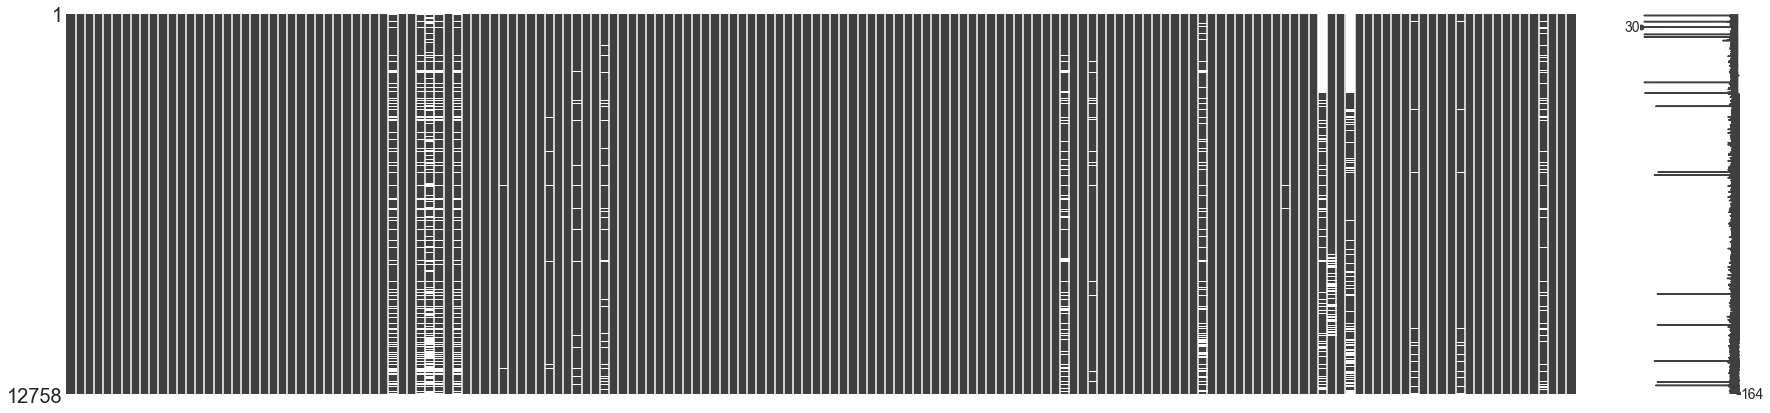

In [140]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_outfield_raw
msno.matrix(df_fbref_outfield_raw, figsize = (30, 7))

In [141]:
# Counts of missing values
null_value_stats = df_fbref_outfield_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Nation       1
Pos          1
Age          1
Born         1
xG          15
          ... 
OG          18
Recov       15
Won         15
Lost        15
Won%      1690
Length: 134, dtype: int64

The visualisation shows us very quickly that there are missing values in the dataset but as this data is scraped, this fine at this stage.

### <a id='#section3.4'>3.4. Goalkeepers</a>

#### <a id='#section3.4.1'>3.4.1. Data Dictionary</a>
The raw dataset has one hundred and eighty eight features (columns) with the following definitions and data types:

| Variable     | Data Type    | Description    |
|------|-----|-----|
| `squad`    | object    | Squad name e.g. Arsenal    |
| `players_used`    | float64    | Number of Players used in Games    |
| `possession`    | float64    | Percentage of time with possession of the ball    |

[MORE DEFINITIONS TO BE ADDED]

#### <a id='#section3.4.2'>3.4.2. Creating the DataFrame - scraping the data</a>
Scrape the data and save as a pandas DataFrame using the function `get_keeper_data`.

Like the outfielders, to download the goalkeeper data we are not required to download the data for individual leagues and concatenate them, they can be downloaded as one from the 'Big 5' European leagues goalkeepers page.

In [163]:
lst_league_names = ['Big-5-European-Leagues']     #'Premier-League', 'Ligue-1', 'Bundesliga', 'Serie-A', 'La-Liga', 'Major-League-Soccer']
lst_seasons = ['2017-2018', '2018-2019', '2019-2020', '2020-2021', '2021-2022']

df_fbref_goalkeeper_raw = get_fbref_goalkeeper_stats(lst_league_names, lst_seasons)

Scraping started at: 2021-09-01 23:20:42.877355
Scraping started for the 2017-2018 season...
Goalkeeper stats data for the Big-5-European-Leagues league for the 2017-2018 season already saved as a CSV file.
Scraping started for the 2018-2019 season...
Goalkeeper stats data for the Big-5-European-Leagues league for the 2018-2019 season already saved as a CSV file.
Scraping started for the 2019-2020 season...
Goalkeeper stats data for the Big-5-European-Leagues league for the 2019-2020 season already saved as a CSV file.
Scraping started for the 2020-2021 season...
Goalkeeper stats data for the Big-5-European-Leagues league for the 2020-2021 season already saved as a CSV file.
Scraping started for the 2021-2022 season...
Goalkeeper stats data for the Big-5-European-Leagues league for the 2021-2022 season already saved as a CSV file.
Scraping ended at: 2021-09-01 23:20:42.878653
Time taken to scrape the goalkeeper stats data for 1 leagues for 5 seasons is: 0.00 minutes.
Goalkeeper stats D

#### <a id='#section3.4.3'>3.4.3. Preliminary Data Handling</a>
Let's quality of the dataset by looking first and last rows in pandas using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods.

In [145]:
# Display the first five rows of the raw DataFrame, df_fbref_goalkeeper_raw
df_fbref_goalkeeper_raw.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,Matches,FK,CK,OG,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp,Att,Cmp%,Att.1,Thr,Launch%,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,Recov,Won,Lost,Won%,League Name,League ID,Season
777,Abdoulaye Diallo,sn SEN,GK,Rennes,fr Ligue 1,25,1992,3,3,270,3.0,5,1.67,16,12,75.0,0,2,1,0,0.0,1,1,0,0,0.0,Matches,1,0,0,6.9,0.37,+1.9,+0.64,9,32,28.1,53,10,37.7,36.2,12,100.0,64.2,19,3,15.8,2,0.67,18.9,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,7.9,NaN,3,0,NaN,31,0.67,4,5,-1,-0.33,-0.53,4.8,5.1,-0.3,-0.08,+0.03,0,0,0,0,0,0,0,0,0,13,0,0,NaN,Big-5-European-Leagues,Big5,2017-2018
730,AdriÃ¡n,es ESP,GK,West Ham,eng Premier League,30,1987,19,19,1710,19.0,29,1.53,96,66,70.8,7,6,6,6,31.6,1,1,0,0,0.0,Matches,1,8,1,27.3,0.28,-0.7,-0.04,159,470,33.8,387,47,78.0,54.1,186,90.3,61.9,197,12,6.1,14,0.74,13.9,0,0,0,0,2,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,50.0,NaN,19,0,NaN,19,1.42,30,29,+1,+0.05,+1.16,21.4,30.3,-8.9,-0.47,+0.08,0,0,3,0,0,0,0,0,0,116,0,0,NaN,Big-5-European-Leagues,Big5,2017-2018
827,Alban Lafont,fr FRA,GK,Toulouse,fr Ligue 1,18,1999,38,38,3420,38.0,54,1.42,161,113,70.2,9,10,19,12,31.6,6,6,0,0,0.0,Matches,3,9,0,52.6,0.30,-1.4,-0.04,239,615,38.9,793,115,55.0,44.3,206,86.9,61.5,448,41,9.2,44,1.16,17.1,0,0,0,0,4,0,0.00,0.00,0.00,0.00,0.00,0.1,0.1,0.0,0.1,0.00,0.00,0.00,0.00,0.00,90,100.0,NaN,38,0,NaN,0,0.97,38,54,-16,-0.42,NaN,46.0,53.3,-7.3,-0.19,NaN,0,3,7,0,0,0,0,0,1,236,0,0,NaN,Big-5-European-Leagues,Big5,2017-2018
748,Albano Bizzarri,ar ARG,GK,Udinese,it Serie A,39,1977,32,32,2880,32.0,52,1.62,137,91,63.5,11,4,17,8,25.0,5,2,2,1,50.0,Matches,1,9,4,42.0,0.29,-6.0,-0.19,262,612,42.8,774,135,52.5,41.1,271,76.0,53.2,306,26,8.5,13,0.41,13.0,0,0,0,0,0,1,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,84.2,NaN,31,0,NaN,5,1.16,41,52,-11,-0.34,+0.32,37.1,42.6,-5.5,-0.17,+0.11,0,2,3,0,0,0,0,0,0,186,0,0,NaN,Big-5-European-Leagues,Big5,2017-2018
755,Alberto Brignoli,it ITA,GK,Benevento,it Serie A,25,1991,13,11,1126,12.5,31,2.48,71,42,59.2,1,2,10,2,18.2,4,2,0,2,0.0,Matches,0,6,0,29.0,0.40,-2.0,-0.16,92,266,34.6,374,61,51.3,43.2,103,71.8,56.1,144,25,17.4,16,1.28,17.0,1,0,1,0,2,0,0.08,0.00,0.08,0.08,0.08,0.1,0.1,0.0,0.1,0.01,0.00,0.01,0.01,0.01,87,32.9,NaN,11,2,NaN,25,0.38,14,31,-17,-1.36,-0.02,13.3,25.5,-12.2,-0.97,-0.05,0,3,1,0,0,0,0,0,1,59,0,0,NaN,Big-5-European-Leagues,Big5,2017-2018


In [146]:
# Display the last five rows of the raw DataFrame, df_fbref_goalkeeper_raw
df_fbref_goalkeeper_raw.tail()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,Matches,FK,CK,OG,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp,Att,Cmp%,Att.1,Thr,Launch%,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,Recov,Won,Lost,Won%,League Name,League ID,Season
507,Yann Sommer,ch SUI,GK,M'Gladbach,de Bundesliga,32,1988,3,3,270,3.0,7,2.33,17,11,58.8,0,1,2,0,0.0,0,0,0,0,NaN,Matches,0,1,1,7.3,0.43,+1.3,+0.43,18,49,36.7,89,9,41.6,38.9,25,48.0,41.6,21,2,9.5,2,0.67,13.0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,100.0,90,3,0,NaN,0,0.33,2,7,-5,-1.67,NaN,5.9,6.6,-0.8,-0.25,NaN,0,0,0,0,0,0,0,0,0,18,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022
419,Yassine Bounou,ma MAR,GK,Sevilla,es La Liga,30,1991,2,2,180,2.0,1,0.50,4,3,75.0,1,1,0,1,50.0,0,0,0,0,NaN,Matches,0,0,0,0.2,0.06,-0.8,-0.38,6,14,42.9,41,10,22.0,30.1,14,35.7,38.6,14,0,0.0,4,2.00,19.9,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,66.7,90,2,0,NaN,0,2.00,2,1,+1,+0.50,-2.50,2.4,1.2,+1.2,+0.62,-2.59,0,0,0,0,0,0,0,0,0,8,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022
494,Ãlex Remiro,es ESP,GK,Real Sociedad,es La Liga,26,1995,3,3,270,3.0,4,1.33,9,5,55.6,2,0,1,2,66.7,0,0,0,0,NaN,Matches,0,0,0,3.5,0.39,-0.5,-0.16,22,38,57.9,70,8,40.0,36.7,18,55.6,47.9,21,3,14.3,2,0.67,18.8,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,100.0,90,3,0,NaN,0,2.00,4,4,0,0.00,NaN,3.8,3.4,+0.4,+0.14,NaN,0,0,1,0,0,0,0,0,0,10,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022
437,Åukasz FabiaÅski,pl POL,GK,West Ham,eng Premier League,36,1985,3,3,270,3.0,5,1.67,6,1,16.7,2,1,0,0,0.0,0,0,0,0,NaN,Matches,0,0,0,3.1,0.52,-1.9,-0.62,19,40,47.5,45,9,57.8,44.4,20,70.0,48.3,25,2,8.0,0,0.00,13.6,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,100.0,90,3,0,NaN,0,2.33,10,5,+5,+1.67,NaN,6.0,2.9,+3.1,+1.03,NaN,0,0,0,0,0,0,0,0,0,6,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022
506,Åukasz Skorupski,pl POL,GK,Bologna,it Serie A,30,1991,2,2,180,2.0,2,1.00,6,5,83.3,1,1,0,1,50.0,1,1,0,0,0.0,Matches,0,0,0,2.1,0.29,+0.1,+0.03,6,28,21.4,52,7,40.4,36.8,20,35.0,34.4,16,1,6.3,0,0.00,11.4,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,100.0,90,2,0,NaN,0,2.00,3,2,+1,+0.50,NaN,1.8,2.6,-0.8,-0.38,NaN,0,0,0,0,0,0,0,0,0,7,0,0,NaN,Big-5-European-Leagues,Big5,2021-2022


[shape](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) returns a tuple representing the dimensionality of the DataFrame.

In [147]:
# Print the shape of the raw DataFrame, df_fbref_goalkeeper_raw
print(df_fbref_goalkeeper_raw.shape)

(932, 104)


[columns](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.columns.html) returns the column labels of the DataFrame.

In [148]:
# Features (column names) of the raw DataFrame, df_fbref_goalkeeper_raw
df_fbref_goalkeeper_raw.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'TklW', 'PKwon', 'PKcon', 'Recov', 'Won', 'Lost', 'Won%', 'League Name',
       'League ID', 'Season'],
      dtype='object', length=104)

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [150]:
# Displays all columns
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    print(df_fbref_goalkeeper_raw.dtypes)

Player         object
Nation         object
Pos            object
Squad          object
Comp           object
Age            object
Born           object
MP             object
Starts         object
Min            object
90s            object
GA             object
GA90           object
SoTA           object
Saves          object
Save%          object
W              object
D              object
L              object
CS             object
CS%            object
PKatt          object
PKA            object
PKsv           object
PKm            object
Save%.1        object
Matches        object
FK             object
CK             object
OG             object
PSxG           object
PSxG/SoT       object
PSxG+/-        object
/90            object
Cmp            object
Att            object
Cmp%           object
Att.1          object
Thr            object
Launch%        object
AvgLen         object
Att.2          object
Launch%.1      object
AvgLen.1       object
Opp            object
Stp       

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [151]:
# Info for the raw DataFrame, df_fbref_goalkeeper_raw
df_fbref_goalkeeper_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932 entries, 777 to 506
Columns: 104 entries, Player to Season
dtypes: object(104)
memory usage: 764.5+ KB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [152]:
# Description of the raw DataFrame, df_fbref_goalkeeper_raw, showing some summary statistics for each numberical column in the DataFrame
df_fbref_goalkeeper_raw.describe()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,90s,GA,GA90,SoTA,Saves,Save%,W,D,L,CS,CS%,PKatt,PKA,PKsv,PKm,Save%.1,Matches,FK,CK,OG,PSxG,PSxG/SoT,PSxG+/-,/90,Cmp,Att,Cmp%,Att.1,Thr,Launch%,AvgLen,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Gls,Ast,G-PK,PK,CrdY,CrdR,Gls.1,Ast.1,G+A,G-PK.1,G+A-PK,xG,npxG,xA,npxG+xA,xG.1,xA.1,xG+xA,npxG.1,npxG+xA.1,Mn/MP,Min%,Mn/Start,Compl,Subs,Mn/Sub,unSub,PPM,onG,onGA,+/-,+/-90,On-Off,onxG,onxGA,xG+/-,xG+/-90,On-Off.1,2CrdY,Fls,Fld,Off,Crs,Int,TklW,PKwon,PKcon,Recov,Won,Lost,Won%,League Name,League ID,Season
count,932,932,932,932,932,932,932,932,932,930,932,932,930,932,932,916,932,932,932,932,908,932,932,932,932,627,932,932,932,932,932,916,932,932,932,932,925,932,932,930,930,932,924,924,932,932,920,932,929,922,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,932,710,851,932,109,932,932,932,932,932,932,770,932,932,932,932,770,932,932,932,932,932,932,932,932,932,932,932,932,62,932,932,932
unique,388,55,6,136,6,27,27,39,40,273,192,76,199,190,145,242,32,19,29,24,162,17,14,6,5,27,1,7,16,8,413,61,171,193,295,470,301,523,203,471,307,298,468,430,349,51,143,50,142,135,3,4,3,3,7,3,4,10,11,4,11,7,6,11,12,5,11,11,4,11,50,277,22,40,5,56,39,185,87,76,95,292,350,421,414,347,309,269,3,7,15,3,3,4,5,2,5,217,4,4,6,1,1,5
top,Pepe Reina,es ESP,GK,Levante,it Serie A,28,1992,1,1,90,1.0,1,1.00,5,2,66.7,0,0,1,0,0.0,0,0,0,0,0.0,Matches,0,0,0,0.0,0.28,0.0,0.00,9,13,50.0,18,9,50.0,40.7,7,100.0,46.3,10,0,0.0,0,0.00,14.0,0,0,0,0,0,0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,90,100.0,90,1,0,45,0,0.00,3,1,0,0.00,0.00,0.9,0.9,+0.1,+0.02,-0.11,0,0,0,0,0,0,0,0,0,6,0,0,0.0,Big-5-European-Leagues,Big5,2020-2021
freq,6,166,922,14,212,76,109,121,118,95,97,77,77,34,36,48,209,232,170,235,214,294,325,638,798,333,932,620,286,567,16,80,34,28,24,14,24,9,34,14,11,21,44,9,19,142,130,138,135,26,923,903,924,926,549,876,923,903,899,924,900,904,904,768,751,921,830,823,922,823,676,162,607,103,787,23,303,86,69,70,89,89,11,15,16,16,12,12,923,664,369,921,919,895,905,927,760,27,904,889,34,932,932,209


Next, we will check to see how many missing values we have i.e. the number of NULL values in the dataset, and in what features these missing values are located. This can be plotted nicely using the [missingno](https://pypi.org/project/missingno/) library (pip install missingno).

<AxesSubplot:>

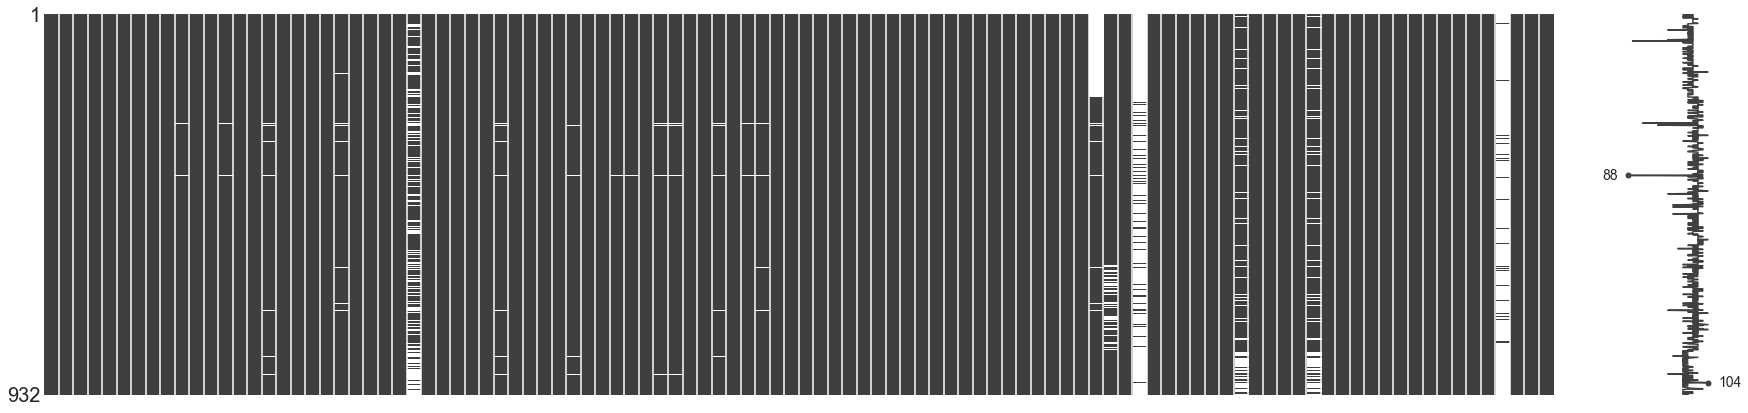

In [153]:
# Plot visualisation of the missing values for each feature of the raw DataFrame, df_fbref_goalkeeper_raw
msno.matrix(df_fbref_goalkeeper_raw, figsize = (30, 7))

In [154]:
# Counts of missing values
null_value_stats = df_fbref_goalkeeper_raw.isnull().sum(axis=0)
null_value_stats[null_value_stats != 0]

Min            2
GA90           2
Save%         16
CS%           24
Save%.1      305
PSxG/SoT      16
Cmp%           7
Launch%        2
AvgLen         2
Launch%.1      8
AvgLen.1       8
Stp%          12
#OPA/90        3
AvgDist       10
Mn/Start     222
Compl         81
Mn/Sub       823
On-Off       162
On-Off.1     162
Won%         870
dtype: int64

The visualisation shows us very quickly that there are missing values in the dataset but as this data is scraped, this fine at this stage.

___

<a id='section4'></a>

## <a id='#section4'>4. Summary</a>
This notebook scrapes player statstics data from [FBref](https://fbref.com/en/) via [StatsBomb](https://statsbomb.com/), using [pandas](http://pandas.pydata.org/) for data manipulation through DataFrames.

With this notebook we now have aggregated player performance data for players in the 'Big 5' European leagues for the 17/18-present seasons.

___

<a id='section5'></a>

## <a id='#section5'>5. Next Steps</a>
This data is now ready to be engineered before being matched to other datasets such as data from [TransferMarkt](https://www.transfermarkt.co.uk/) and [Capology](https://www.capology.com/).

The Data Engineering subfolder in GitHub can be found [here](https://github.com/eddwebster/football_analytics/tree/master/notebooks/B\)%20Data%20Engineering) and a static version of the FBref data engineering notebookecord can be found [here](https://nbviewer.org/github/eddwebster/football_analytics/blob/master/notebooks/3_data_engineering/FBref%20Player%20Stats%20Data%20Engineering.ipynb).

___

<a id='section6'></a>

## <a id='#section6'>6. References</a>

#### Data and Web Scraping
*    [FBref](https://fbref.com/) for the data to scrape
*    FBref statement for using StatsBomb's data: https://fbref.com/en/statsbomb/
*    [StatsBomb](https://statsbomb.com/) providing the data to FBref
*    [FBref_EPL GitHub repository](https://github.com/chmartin/FBref_EPL) by [chmartin](https://github.com/chmartin) for the original web scraping code
*    [Scrape-FBref-data GitHub repository](https://github.com/parth1902/Scrape-FBref-data) by [parth1902](https://github.com/parth1902) for the revised web scraping code for the new FBref metrics


#### Countries
*    [Comparison of alphabetic country codes Wiki](https://en.wikipedia.org/wiki/Comparison_of_alphabetic_country_codes)

---

***Visit my website [eddwebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my Twitter handle is [@eddwebster](http://www.twitter.com/eddwebster) and my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)